In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data=pd.read_csv(r"C:\Users\kisho\OneDrive\Documents\telecom_customer_churn.csv",index_col="Customer ID")
# print(data.head())
# print(data.shape)
# print(data.columns)
# print(data.info())
print(data.describe(percentiles=[0.1,0.3,0.5,0.7,1]))
# print(data.dtypes)
# print(data.head())

               Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
10%      24.000000              0.000000  90733.600000    33.473099   
30%      35.000000              0.000000  92239.000000    34.067932   
50%      46.000000              0.000000  93518.000000    36.205465   
70%      57.000000              0.000000  95111.000000    37.890145   
100%     80.000000              9.000000  96150.000000    41.962127   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.00

In [2]:
data=data.iloc[1000:2000]
data['Total Revenue']=data["Total Revenue"].replace(0,2000)
data=data.dropna(axis=1)
print(data.columns)
data=data.drop(columns=["Total Extra Data Charges","Total Long Distance Charges","City","Total Refunds","Number of Referrals"])
print(data.columns)
print(data.shape)

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Internet Service', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')
Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Zip Code',
       'Latitude', 'Longitude', 'Tenure in Months', 'Phone Service',
       'Internet Service', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')
(1000, 17)


In [3]:
from sklearn.preprocessing import LabelEncoder

label_e = LabelEncoder()
objects=["Gender","Married","Customer Status","Payment Method","Paperless Billing","Contract","Internet Service","Phone Service"]
for i in objects:
    data[i]=label_e.fit_transform(data[i])
print(data.head())

             Gender  Age  Married  Number of Dependents  Zip Code   Latitude  \
Customer ID                                                                    
1450-GALXR        0   33        0                     0     93626  37.027663   
1450-SKCVI        0   22        0                     0     92014  32.948262   
1452-KIOVK        1   42        0                     3     90007  34.027337   
1452-UZOSF        1   31        1                     1     95446  38.525760   
1452-VOQCH        1   61        0                     0     92347  34.983808   

              Longitude  Tenure in Months  Phone Service  Internet Service  \
Customer ID                                                                  
1450-GALXR  -119.690560                10              1                 1   
1450-SKCVI  -117.256086                56              1                 1   
1452-KIOVK  -118.285150                22              1                 1   
1452-UZOSF  -123.013347                72        

In [4]:
import seaborn as sns

for column,dtype in data.dtypes.items():
    if dtype==object:
        print(f"the data type {column}is object")

    elif dtype==pd.Int64Dtype or pd.Float64Dtype:
        # plt.Figure()
        # sns.boxplot(y=data[column])
        # plt.title(f"box plot of {column}")
        # plt.show()
        q1=data[column].quantile(0.25)
        q2=data[column].quantile(0.75)
        iqr=q2-q1
        lower_bound=q1-(1.5*iqr)
        upper_bound=q2+(1.5*iqr)
        outliers=data[(data[column]<lower_bound)|(data[column]>upper_bound)]
        if not outliers.empty:
           print(f"outliers of the {column} is {outliers}")
           data_filtered=data[(data[column]>=lower_bound)&(data[column]<=upper_bound)]
           data_reset=data_filtered.reset_index(drop=True)
        
        else:
          print(f"the {column} has no outlier")
          data[column]=data[column]
        
       


the Gender has no outlier
the Age has no outlier
the Married has no outlier
outliers of the Number of Dependents is              Gender  Age  Married  Number of Dependents  Zip Code   Latitude  \
Customer ID                                                                    
1452-KIOVK        1   42        0                     3     90007  34.027337   
1452-UZOSF        1   31        1                     1     95446  38.525760   
1452-XRSJV        0   59        1                     2     94612  37.809014   
1453-RZFON        0   39        0                     3     93608  36.488056   
1465-WCZVT        0   44        1                     3     93603  36.645450   
...             ...  ...      ...                   ...       ...        ...   
2862-PFNIK        1   47        0                     3     94578  37.704384   
2868-LLSKM        0   50        1                     2     92027  33.141265   
2877-VDUER        0   36        1                     1     93208  36.057458   
2878

In [5]:
from sklearn.preprocessing import StandardScaler

a=["Age","Zip Code","Latitude","Longitude","Tenure in Months","Total Revenue","Total Charges","Monthly Charge"]
scaler=StandardScaler()
for i in a:
    data[i]=scaler.fit_transform(data[i].values.reshape(-1,1))

print(data.head())

             Gender       Age  Married  Number of Dependents  Zip Code  \
Customer ID                                                              
1450-GALXR        0 -0.770769        0                     0  0.068696   
1450-SKCVI        0 -1.420758        0                     0 -0.805560   
1452-KIOVK        1 -0.238960        0                     3 -1.894041   
1452-UZOSF        1 -0.888949        1                     1  1.055760   
1452-VOQCH        1  0.883749        0                     0 -0.624960   

             Latitude  Longitude  Tenure in Months  Phone Service  \
Customer ID                                                         
1450-GALXR   0.327985   0.031379         -0.882362              1   
1450-SKCVI  -1.305049   1.139185          0.995525              1   
1452-KIOVK  -0.873082   0.670910         -0.392478              1   
1452-UZOSF   0.927691  -1.480654          1.648703              1   
1452-VOQCH  -0.490195   1.146821         -1.249775              1  

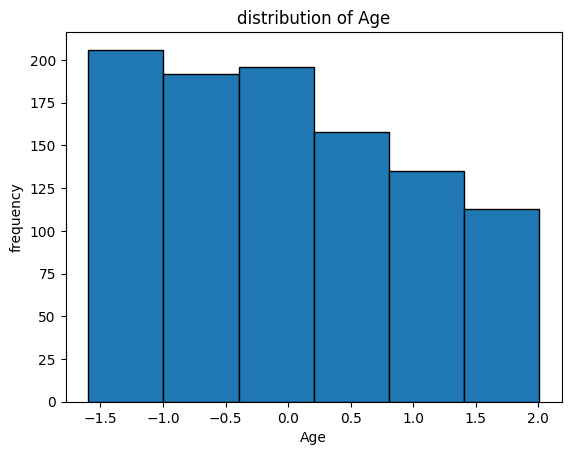

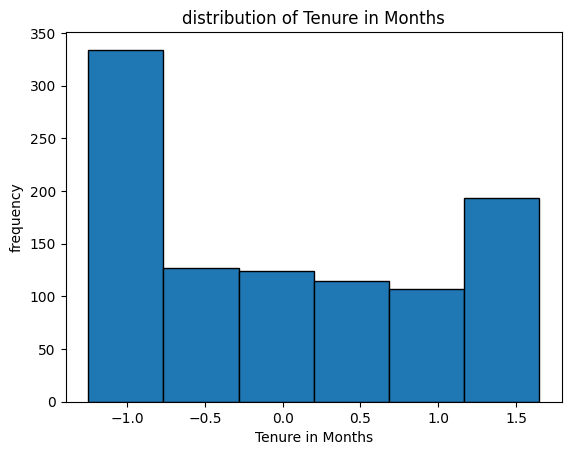

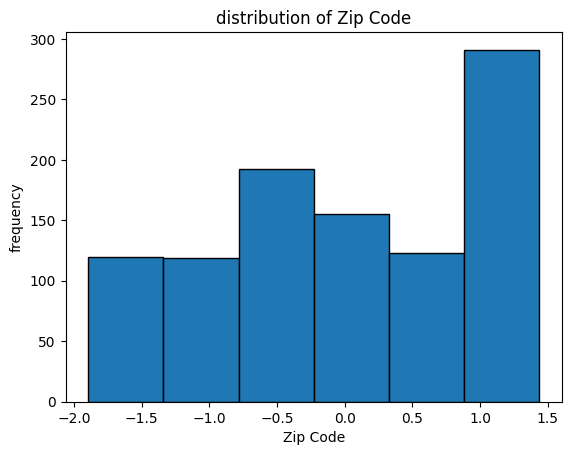

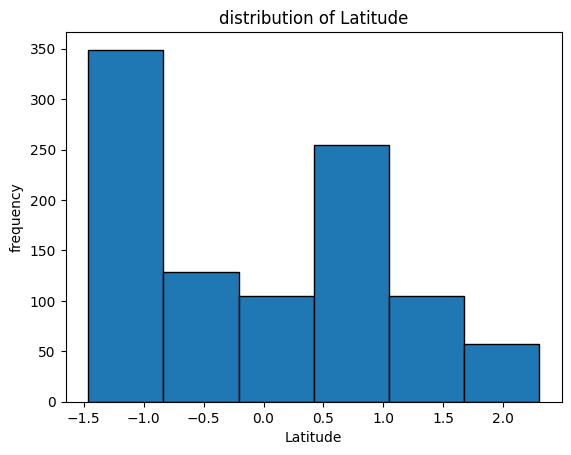

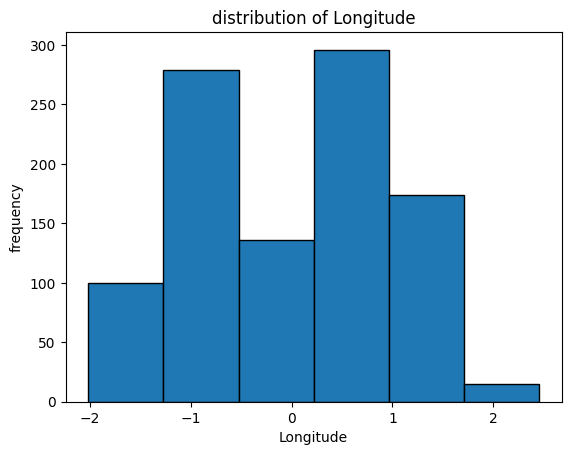

In [6]:
import matplotlib.pyplot as plt

a=["Age","Tenure in Months","Zip Code","Latitude","Longitude"]
for i in a:
    plt.hist(data[i],bins=6,edgecolor="black")
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.title(f"distribution of {i}")
    plt.show()


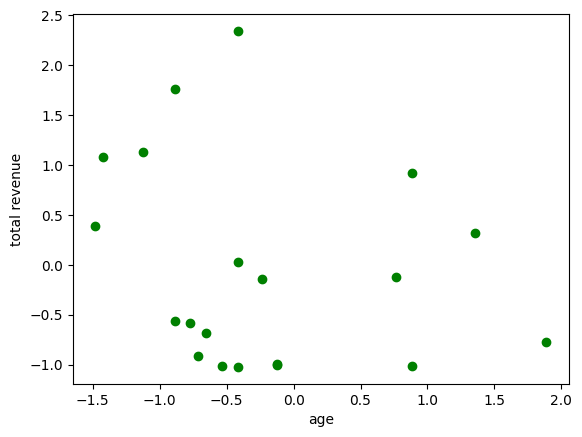

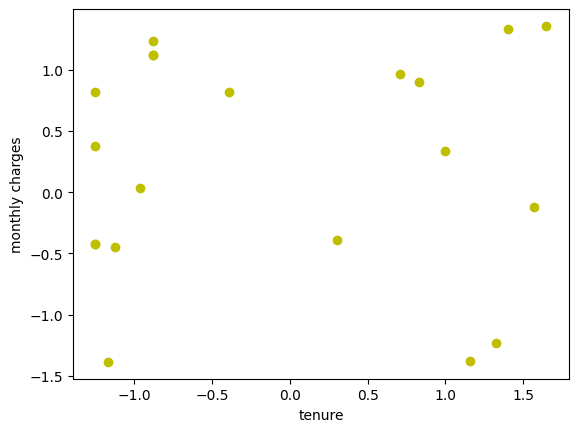

0.8245877706831589


In [7]:
#bivariate analysis
plt.scatter(data["Age"][:20],data["Total Revenue"][:20],color="green")
plt.xlabel("age")
plt.ylabel("total revenue")
plt.show()

plt.scatter(data["Tenure in Months"][:20],data["Monthly Charge"][:20],color="y")
plt.xlabel("tenure")
plt.ylabel("monthly charges")
plt.show()
#covariance matrix
cov=data["Tenure in Months"].cov(data["Total Charges"])
print(cov)



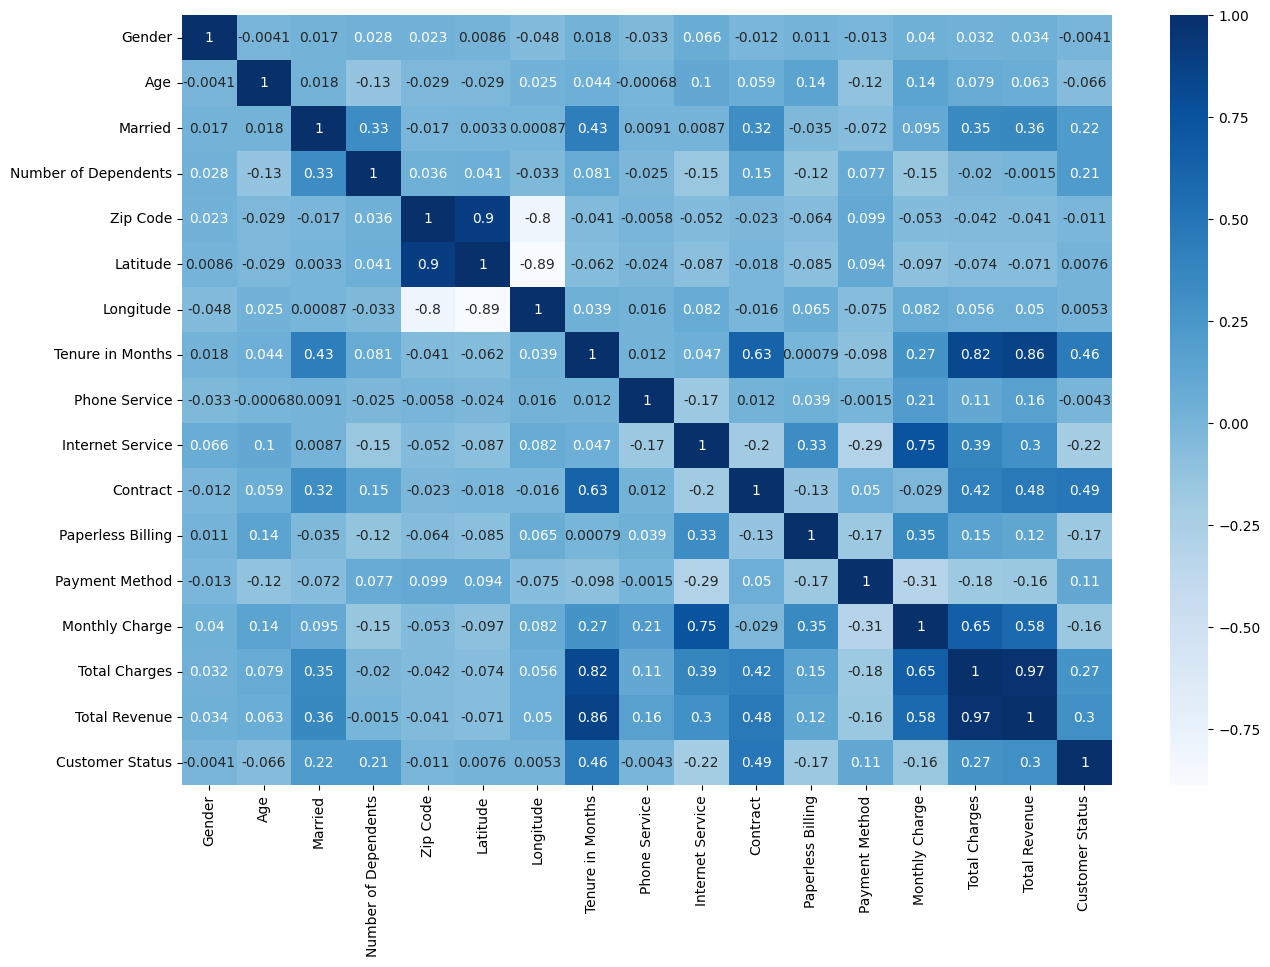

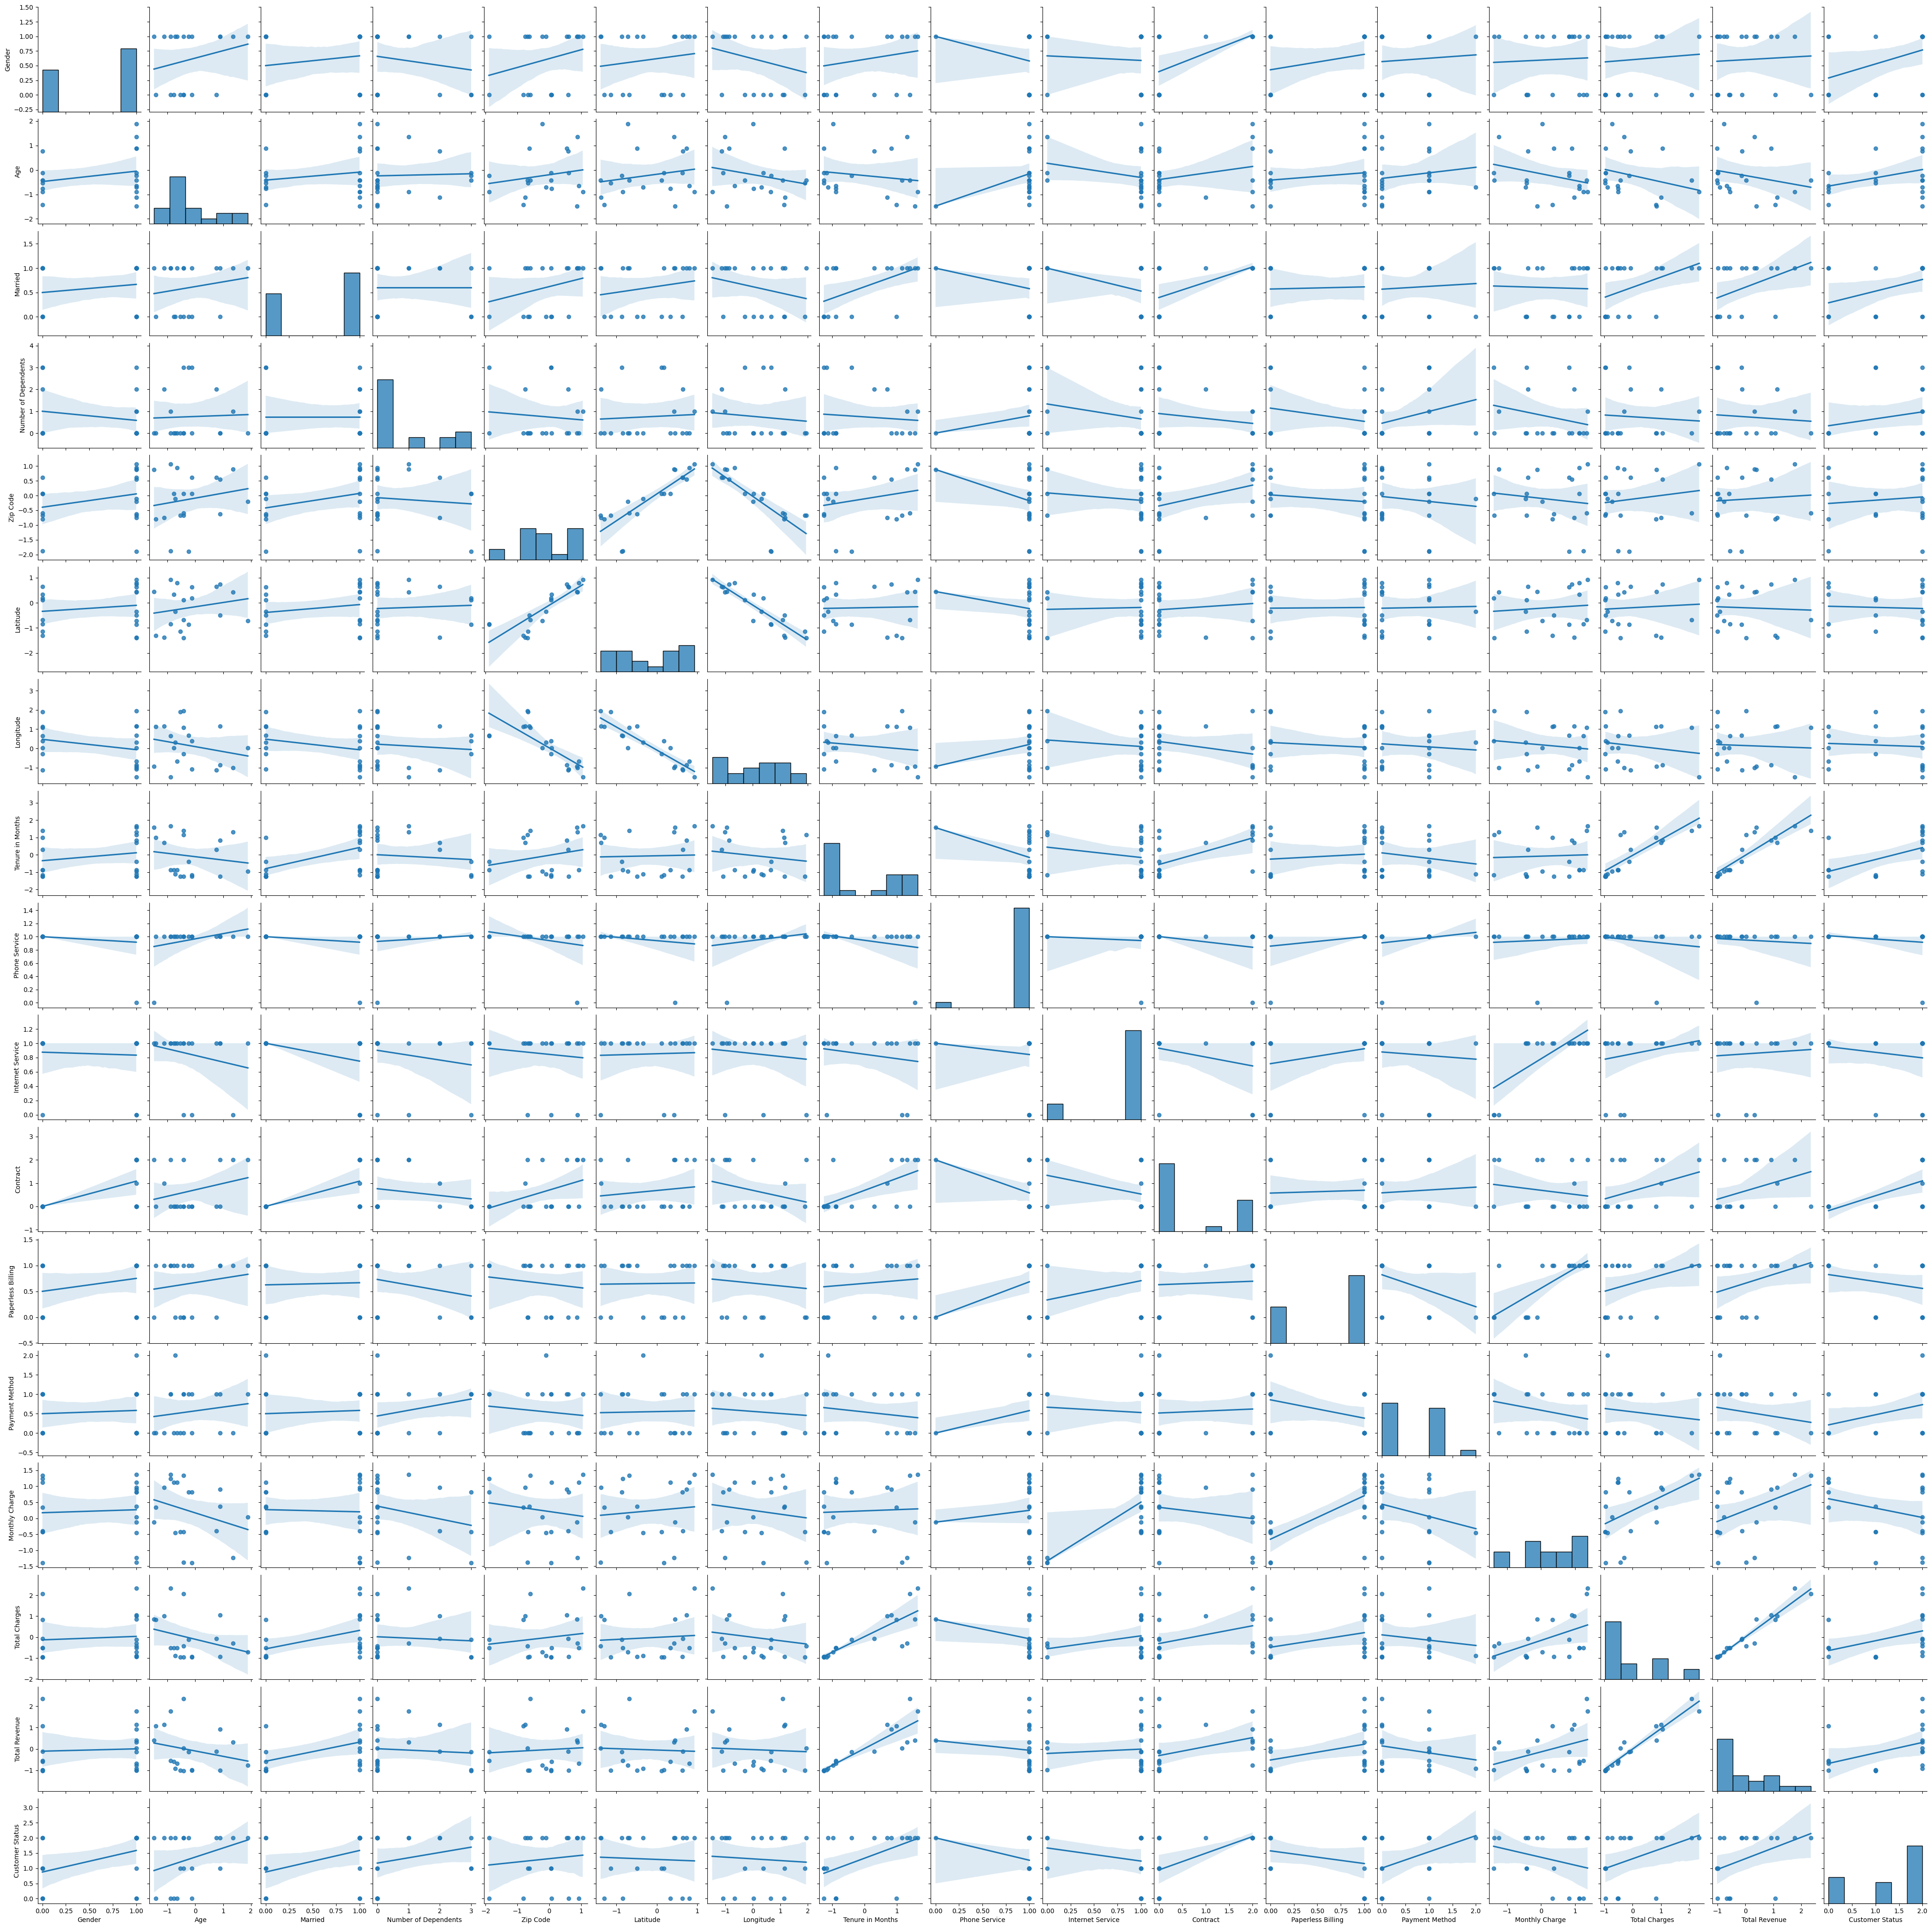

In [8]:
#multivariate analysis
#heatmap
import seaborn as sns
corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="Blues")

#pairplot
sns.pairplot(data[:20],kind="reg")
plt.show()